# Outliers

Date published: 2018-12-28

Category: Math

Subcategory: Descriptive Statistics

Tags: outliers, box plot, python, pandas


An **outlier** is a value that is significantly smaller or larger than other values in a set of data.

### Import Modules

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
% matplotlib inline

#### Set Visualization Style

In [12]:
sns.set_context('talk')
sns.set_style("darkgrid")

### Example: Comparisons of Two Classes with Student Grades on Final Exam

In this scenario, two college professors taught the same exact content to students throughout the year and distributed the same final exam. In each class is a different group of students. In one class, students scored well, and in the other class, not as well.

#### Create Data of Student Scores for Two Classes

Below, I use the NumPy random module and the <a href='https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html'>normal() method</a> to create random samples from a normal (Gaussian) distribution. I seed the generator with the random <a href='https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html'>seed() method</a>.
    
The `normal` method creates float values. I cast those values to be integer values for each class' scores.

In [13]:
np.random.seed(42)
class_one_size = 65
class_one_scores = list(np.random.normal(loc=85, scale=6.1, size=class_one_size))
class_one_scores = [int(class_one_score) for class_one_score in class_one_scores]
class_two_size = 69
class_two_scores = list(np.random.normal(loc=80, scale=6.4, size=class_two_size))
class_two_scores = [int(class_two_score) for class_two_score in class_two_scores]

The code below adds all scores to a <a href='https://pandas.pydata.org/'>*pandas*</a> DataFrame with two columns: `class_name` and `final_exam_score`.

In [14]:
df_class_scores = pd.DataFrame({'class_name': ["A"]*class_one_size + ["B"]*class_two_size,
                   'final_exam_score': class_one_scores + class_two_scores})

Preview the first few rows of `df_class_scores`.

In [15]:
df_class_scores.head()

,class_name,final_exam_score
0,A,88
1,A,84
2,A,88
3,A,94
4,A,83


Students in class A performed much better on average than those in class B. The median final exam score for students in class A was much higher than the score for class B.

#### Outliers with the 1.5 x IQR Rule

Remember, an **outlier** is a value that is significantly smaller or larger than other values in a set of data. One method to identify outliers is to claim that outliers are all values that are either smaller than $Q1 - 1.5*IQR$ or larger than $Q3 + 1.5*IQR$

- $Q1$ is the first quartile, otherwise known as the 25th percentile
- $Q3$ is the third quartile, otherwise known as the 75th percentile
- $IQR$ is the interquartile range and is a calculation of $Q3 - Q1$


I can define a function in Python that will calculate the outliers. I use the Pandas <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html" target="_blank">quantile()</a> method.



In [17]:
def calculate_outliers_iqr_method(values):
    """
    Calculate a list of outliers from a set of values using the IQR method

    :param values: pandas series of numerical values
    :returns: outliers: list of values that are outliers
    """
    q1 = values.quantile(q=0.25)
    q3 = values.quantile(q=0.75)
    iqr = q3 - q1
    
    outliers = []
    for value in values:
        if value > q3 + 1.5*iqr or value < q1 - 1.5*iqr:
            outliers.append(value)
    
    return outliers

In [26]:
for class_name in df_class_scores['class_name'].unique():
    outliers = calculate_outliers_iqr_method(df_class_scores[df_class_scores['class_name']==class_name]['final_exam_score'])
    print("Class {0} has outliers: {1}".format(class_name, outliers))

Class A has outliers: []
Class B has outliers: [63, 95, 94]


class A has 0 outliers and class B has three outliers with values of 63, 95 and 94. We can visualize these outliers using a box plot.

Below, I use the <a href='https://seaborn.pydata.org/'>seaborn</a> visualization library to compare the distributions of scores for class A and class B using a boxplot. You can learn more about how boxplots work from <a href='https://dfrieds.com/data-visualizations/when-use-box-plots'>this tutorial</a> on my site. The seaborn method for identifying outliers with box and whisker plots is the IQR method we utilized above.

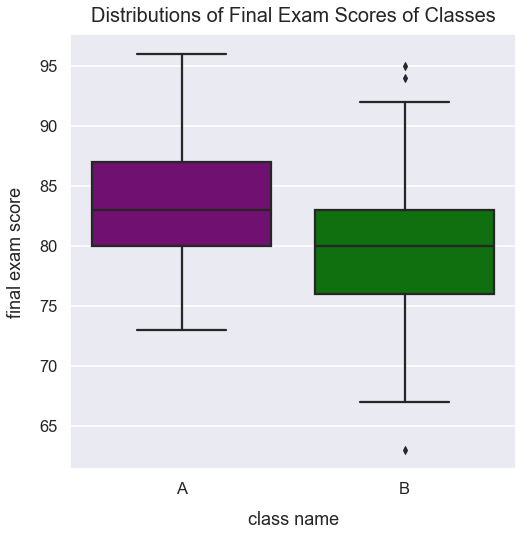

In [16]:
plt.figure(figsize=(8, 8))
my_color_pal = {"A": "purple", "B": "g"}
sns.boxplot(x="class_name", y="final_exam_score", data=df_class_scores, palette=my_color_pal)
plt.title("Distributions of Final Exam Scores of Classes", y=1.015, fontsize=20)
plt.xlabel("class name", labelpad=14)
plt.ylabel("final exam score", labelpad=14);

On the green box plot for class B, I see the outliers of 63, 94 and 95 marked as diamond shapes.